# Simple Linear Regression

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading required dataset

In [ ]:
#df = pd.read_csv("C:\\Users\Vipin G Dubey\\Documents\\ML Lab Sessions\\Lab 1 Regression Analysis\\Height-Weight.csv") 

In [2]:
#path = "C:/Users/Vipin/Documents/ML Lab Sessions/Lab 1 Regression Analysis/Height-Weight.csv"
#df = pd.read_csv(path)
df = pd.read_csv("Height-Weight.csv")

In [3]:
# To see first 5 observations (rows) of your data
df.head() 

,sex,weight,height,repwt,repht
0,F,39,157,41.0,153.0
1,F,43,154,NaN,NaN
2,F,44,157,44.0,155.0
3,F,45,163,45.0,160.0
4,F,45,157,45.0,153.0


In [4]:
# Shape of the data
df.shape

(199, 5)

In [7]:
# Identifying datatypes of the features/variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     199 non-null    object 
 1   weight  199 non-null    int64  
 2   height  199 non-null    int64  
 3   repwt   182 non-null    float64
 4   repht   182 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [8]:
# Summary statistics 
df.describe() 

,weight,height,repwt,repht
count,199.000000,199.000000,182.000000,182.000000
mean,65.195980,170.587940,65.675824,168.527473
std,13.008031,8.948848,13.796043,9.484318
min,39.000000,148.000000,41.000000,148.000000
25%,55.000000,164.000000,55.000000,160.250000
50%,63.000000,170.000000,63.000000,168.000000
75%,73.500000,177.500000,73.750000,175.000000
max,103.000000,197.000000,124.000000,200.000000


In [9]:
#df1 = df[["weight", "height"]]
df1 = df.drop(['sex', 'repwt', 'repht'], axis = 1)

In [10]:
df1.head(2)

,weight,height
0,39,157
1,43,154


In [11]:
df1.shape

(199, 2)

In [12]:
df1.describe()

,weight,height
count,199.000000,199.000000
mean,65.195980,170.587940
std,13.008031,8.948848
min,39.000000,148.000000
25%,55.000000,164.000000
50%,63.000000,170.000000
75%,73.500000,177.500000
max,103.000000,197.000000


# Scatter Plot and Correlation Matrix

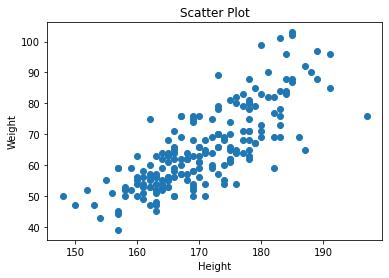

In [13]:
# Scatter Plot
plt.scatter(df1.height, df1.weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter Plot")
plt.show()

In [14]:
# Correlation Matrix
df1.corr() 

,weight,height
weight,1.000000,0.782438
height,0.782438,1.000000


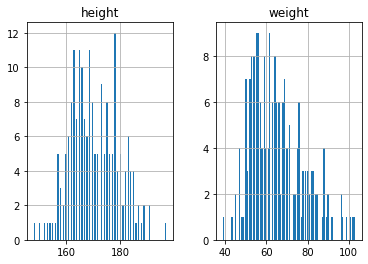

In [15]:
# To check distribution of variables
df1.hist(bins = 100)
plt.show()

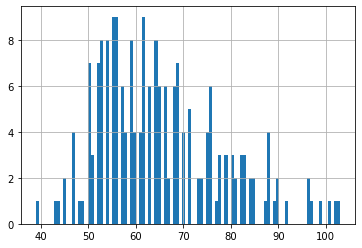

In [16]:
df1.weight.hist(bins = 100);

Weight variable is Moderately Positively Skewed.

In [17]:
df1.weight.skew()

0.7449402052268245

As weight is moderately skewed so we donot need to transform the data. 

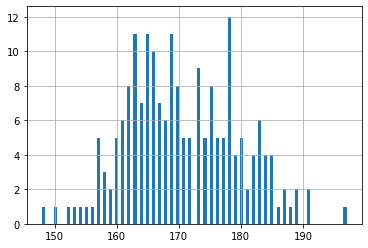

In [18]:
df1.height.hist(bins = 100)

In [19]:
df1.height.skew()

0.2129090698591845

In [20]:
df1.weight.kurt()

0.10785201738505323

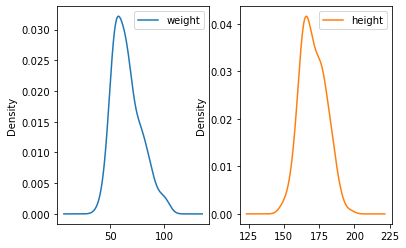

In [24]:
# Density Plot
df1.plot(kind = 'density', subplots=True, sharex= False, sharey= False, layout=(1, 2), figsize = (6, 4))
plt.show()

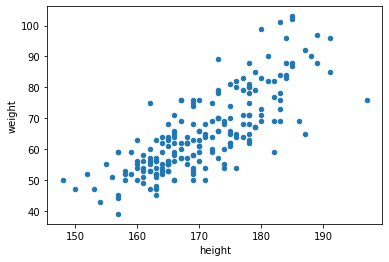

In [28]:
# Scatter Plot
df1.plot(kind = 'scatter', x = 'height', y = 'weight')

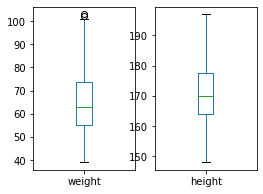

In [22]:
# Box Plot
df1.plot(kind = 'box', subplots=True, sharex= True, sharey=False, layout=(1, 2), figsize = (4, 3))
plt.show()

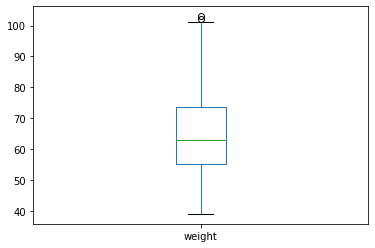

In [29]:
df1.weight.plot(kind = 'box')

Above box plot shows weight variable has some outliers.

In [ ]:
#df1.weight.hist(bins = 20)
#plt.show()

# Linear Model using Sklearn Package

In [30]:
df1[['height']].shape

(199, 1)

In [31]:
# To predict weight using height:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()     # Create linear Regression Object

# We need to pass 2D array, as it is requirement of algorithm
lm.fit(df1[['height']],df1[['weight']])   # lm.fit(X ,dependent var.); Train the model; X: Matrix of independent variables

LinearRegression()

Or we can define X and y; then we can use it to train the model:

In [32]:
# Training data / should be a 2D array
X = df1.height 

# Target variable
y = df1.weight 

In [33]:
X.shape # 1D array

(199,)

In [36]:
y.shape

(199,)

In [37]:
# We use -1 if we don't know length of X
X.values.reshape(-1, 1).shape

(199, 1)

In [38]:
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)
#X = X.values.reshape(-1,1)
print(X.shape, y.shape)

(199, 1) (199, 1)


In [40]:
# Fit to LR model
lm_1 = LinearRegression()
lm_1.fit(X, y)

LinearRegression()

In [41]:
# y intercept (Beta_o)
lm_1.intercept_

array([-128.822307])

In [42]:
# To get model parameters, intercept and coefficient:
print(lm_1.intercept_, lm_1.coef_  )

[-128.822307] [[1.13735055]]


In [43]:
# Coefficinet of determination R_Squared
lm_1.score(X, y)

0.6122090974630856

In [ ]:
#print(lm.coef_ , lm.intercept_)

In [ ]:
#lm.score(df1[['height']],df1[['weight']])   

In [44]:
# To predict weight when height is 150 
print(lm_1.intercept_ + lm_1.coef_ * 150)  # Manually

[[41.78027538]]


In [45]:
lm_1.predict([[150]])   # By using inbuilt function 

array([[41.78027538]])

In [46]:
lm_1.predict([[150], [160]])

array([[41.78027538],
       [53.15378087]])

In [49]:
# To calculate predicted values of y for X
y_pred = lm_1.predict(X)
#y_pred

In [50]:
df1['predicted_weight'] = y_pred
df1.head(10)

,weight,height,predicted_weight
0,39,157,49.741729
1,43,154,46.329678
2,44,157,49.741729
3,45,163,56.565833
4,45,157,49.741729
5,47,163,56.565833
6,47,153,45.192327
7,47,162,55.428482
8,47,150,41.780275
9,48,163,56.565833


In [51]:
# Mean Squared Error
MSE = np.mean((y - y_pred)**2) 
print("Mean Squared Error is:",MSE)

# Root Mean Squared Error
RMSE = np.sqrt(np.mean((y - y_pred)**2))
print("Root Mean Squared Error is:",RMSE)

Mean Squared Error is: 65.2879244485047
Root Mean Squared Error is: 8.08009433413402


In [52]:
# Using inbuilt functions to calculate MSE and R_squared
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred)) # (Actual values, predicted values)

8.08009433413402

In [54]:
# MSE
mean_squared_error(y, y_pred)

65.2879244485047

In [55]:
# R_squared
r2_score(y, y_pred) # (Actual values, predicted values)

0.6122090974630856

# Model Summary using statsmodels.api Package

In [56]:
import statsmodels.api as sm

model_1 = sm.OLS(df1.weight, df1.height) # sm.OLS(response , predictor)
#model1 = sm.OLS(df1.weight, df1.height)
result = model_1.fit() # The o/p of Training part is stored in an object called result

In [57]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 weight   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              7713.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                   1.61e-160
Time:                        11:10:00   Log-Likelihood:                         -750.61
No. Observations:                 199   AIC:                                      1503.
Df Residuals:                     198   BIC:                                      1507.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [58]:
# Adding constant in independent variable
X_new = sm.add_constant(df1.height)

In [59]:
X_new

,const,height
0,1.0,157
1,1.0,154
2,1.0,157
3,1.0,163
4,1.0,157
...,...,...
194,1.0,189
195,1.0,183
196,1.0,185
197,1.0,185


In [60]:
model_2 = sm.OLS(df1.weight, X_new)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     311.0
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           2.17e-42
Time:                        11:11:58   Log-Likelihood:                -698.16
No. Observations:                 199   AIC:                             1400.
Df Residuals:                     197   BIC:                             1407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -128.8223     11.017    -11.693      0.0

# Model Summary using statsmodels.formula.api Package

In [61]:
import statsmodels.formula.api as smf 

model_3 = smf.ols(formula = 'weight ~ height', data = df1)
result = model_3.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     311.0
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           2.17e-42
Time:                        11:26:25   Log-Likelihood:                -698.16
No. Observations:                 199   AIC:                             1400.
Df Residuals:                     197   BIC:                             1407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -128.8223     11.017    -11.693      0.0

# Splitting Dataset into Training Set & Testing Set

In [62]:
from sklearn.model_selection import train_test_split

seed = 10
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed) 

In [63]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((40, 1), (40, 1), (159, 1), (159, 1))

In [64]:
# train the model on training data:
reg = LinearRegression()
reg.fit(X_train,y_train) # Fitting model using training data

LinearRegression()

In [65]:
# regression coefficients:
print('Coefficient: \n', reg.coef_) 
print('Intercept: \n',reg.intercept_)

Coefficient: 
 [[1.17050429]]
Intercept: 
 [-134.41980478]


In [66]:
# Prediction on test set:

y_test_pred = reg.intercept_ + reg.coef_*X_test 

In [ ]:
#pred = reg.predict(X_test) # Prediction using inbuilt method 

In [67]:
#Root Mean Sqared Error: (Test Set)

#MSE = np.mean((np.array(y_test) -np.array( pred))**2)
RMSE = np.sqrt(np.mean((np.array(y_test) -np.array( y_test_pred))**2))
print(RMSE)

6.720405459097611


In [68]:
#MSE: (Test Set)
RMSE**2

45.16384953466897

In [69]:
#from sklearn.metrics import mean_squared_error, r2_score

print(np.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))


6.720405459097611
0.7053650849895199


In [70]:
reg.predict([[170]]) # weight value prediction for height=170  

array([[64.56592403]])

In [71]:
#Root Mean Sqared Error: (Train Set)

y_pred_train = reg.predict(X_train)
RMSE_train = np.sqrt(np.mean(((y_train - y_pred_train)**2)))
RMSE_train

8.394309281822132

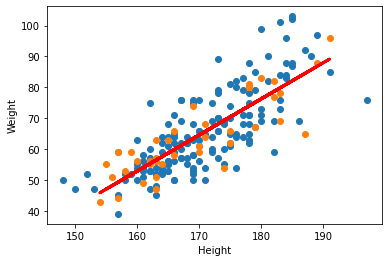

In [72]:
# To plot regression line
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.plot(np.array(X_test), y_test_pred, color = 'red', linewidth = 3)

plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

## Model Diagnostic

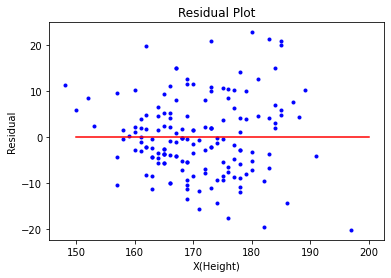

In [73]:
#Residual Plot
residual = y_train - y_pred_train
plt.plot(X_train, residual,  'b.')
plt.plot([150, 200],[0,0],'r')
plt.xlabel("X(Height)")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

0.9863866069891377

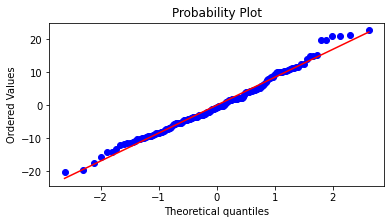

In [74]:
# Q-Q Plot to check the normality of residuals

residual = y_train - y_pred_train
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(residual.ravel(), plot=ax, fit=True)
r**2

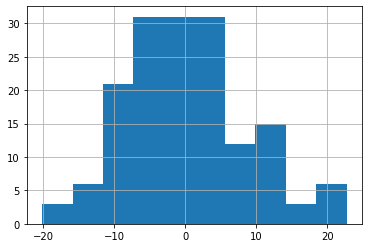

In [75]:
pd.Series(residual.ravel()).hist()

In [76]:
seed = 10
test_size = 0.3
trainingSet, testSet = train_test_split(df1, test_size = test_size, random_state = seed)

In [77]:
#Using statsmodels.formula.api package
import statsmodels.formula.api as smf
lm_2=smf.ols(formula = 'weight ~ height', data = trainingSet)
fit_2 = lm_2.fit()
print(fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           1.26e-27
Time:                        12:22:47   Log-Likelihood:                -492.36
No. Observations:                 139   AIC:                             988.7
Df Residuals:                     137   BIC:                             994.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -129.2039     14.173     -9.116      0.0

In [78]:
print("beta_0 = ", fit_2.params[0])
print("beta_1 = ", fit_2.params[1])

beta_0 =  -129.20391560269977
beta_1 =  1.1402863628961435


In [79]:
data = residual.ravel()
data.sort()
norm = np.random.normal(0,1,len(data))
norm.sort()


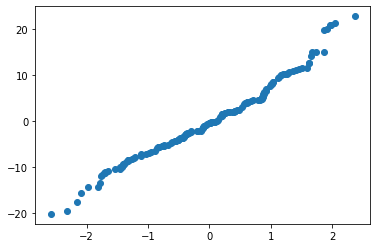

In [80]:
plt.plot(norm, data, 'o')

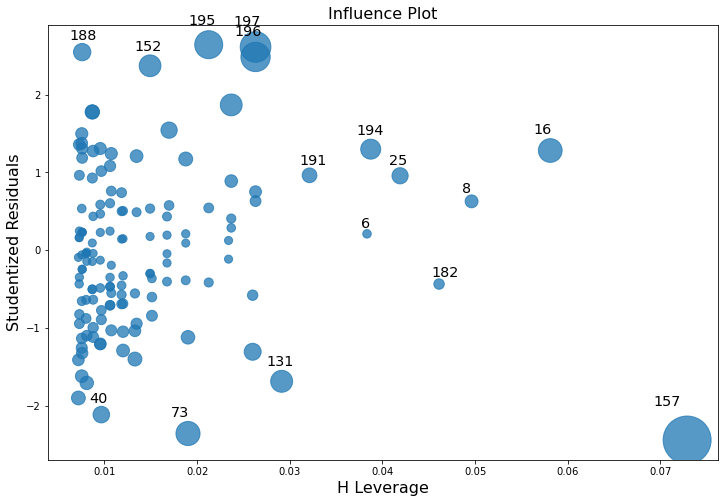

In [81]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fit_2, ax=ax, criterion="cooks")

### Residual plot

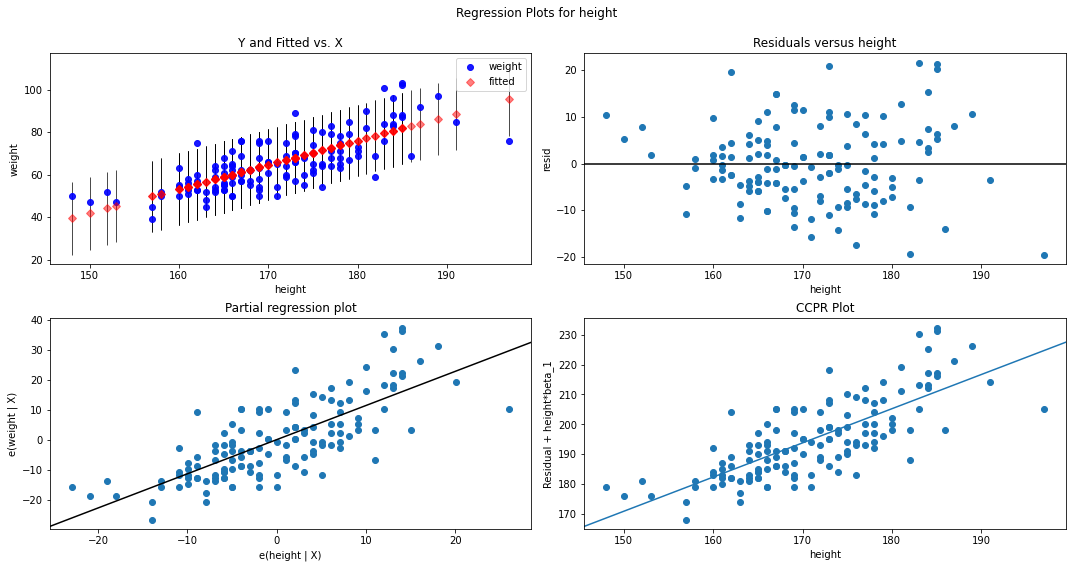

In [82]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(fit_2, 'height', fig=fig)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

In [ ]:
boston.feature_names

In [ ]:
df = pd.DataFrame(data =boston.data, columns = boston.feature_names)

In [ ]:
df.head()

In [ ]:
df['PRICE'] = boston.target

You have to perform exploratory data analysis for this data.

In [ ]:
df.PRICE.hist(bins = 100)

In [ ]:
df.PRICE.skew()

In [ ]:
df.PRICE.plot(kind = 'box')

### * 1. Do some research on statsmodels package to automatically fetch the indexes of infuential data points. Remove it from the data and rebuild the regression model and compare the results.

### * 2. Perform EDA on Boston dataset. Note down your findings/interpretation obtained from plots/graphs (for univariate as well as bivariate analysis).

In [ ]:
!pip install xgboost